In [2]:
import pandas as pd

In [3]:
import csv

In [5]:
import matplotlib.pyplot as plt

In [21]:
import numpy as np

In [23]:
from sklearn.cluster import KMeans

In [69]:
import seaborn as sns

In [8]:
df=pd.read_csv("Mall_Customers segmentation data.csv")

In [10]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [12]:
df["Age"].mean()

np.float64(38.85)

In [13]:
df["Age"].median()

np.float64(36.0)

In [16]:
df["Age"].quantile()

np.float64(36.0)

In [18]:
df["Spending Score (1-100)"].mean()

np.float64(50.2)

In [19]:
df["Spending Score (1-100)"].median()

np.float64(50.0)

In [20]:
df["Spending Score (1-100)"].quantile()

np.float64(50.0)

In [35]:
df=df.head(20)

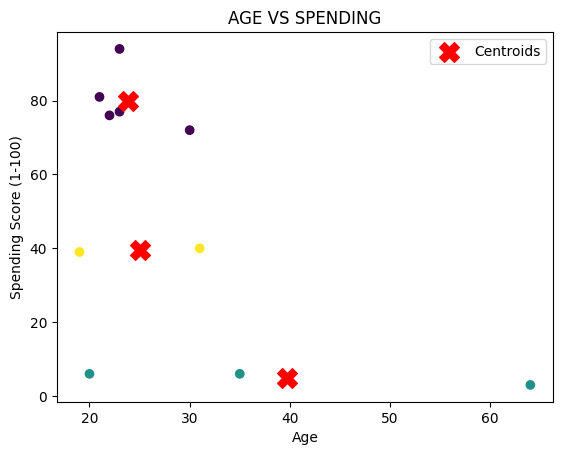

In [63]:
# Apply K-Means clustering
X = df[["Age", "Spending Score (1-100)"]]
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(X)

# Plot the clusters
plt.scatter(df["Age"], df["Spending Score (1-100)"], c=df["Cluster"], cmap="viridis", marker="o")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            color="red", marker="X", s=200, label="Centroids")

plt.xlabel("Age")
plt.ylabel("Spending Score (1-100)")
plt.title("AGE VS SPENDING")
plt.legend()
plt.show()

C:\Users\Student.DESKT-08\AppData\Local\Temp\ipykernel_8448\2400599818.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


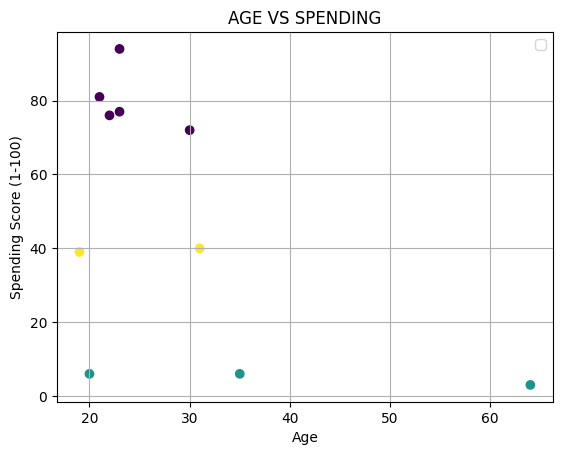

In [61]:
plt.scatter(df["Age"], df["Spending Score (1-100)"], c=df["Cluster"],cmap="viridis", marker="o")
plt.xlabel("Age")
plt.ylabel("Spending Score (1-100)")
plt.title("AGE VS SPENDING")
plt.legend()
plt.grid()
plt.show()

In [67]:
#Adding new row of age group into a file.
age_bin= [17,25,35,50,70]
age_lbs=["18-25","26-35","36-50","51-70"]
df["Age Group"]=pd.cut(df["Age"], bins=age_bin, labels=age_lbs, right=True)

In [68]:
print(df["Age Group"].value_counts())

Age Group
18-25    6
26-35    3
51-70    1
36-50    0
Name: count, dtype: int64


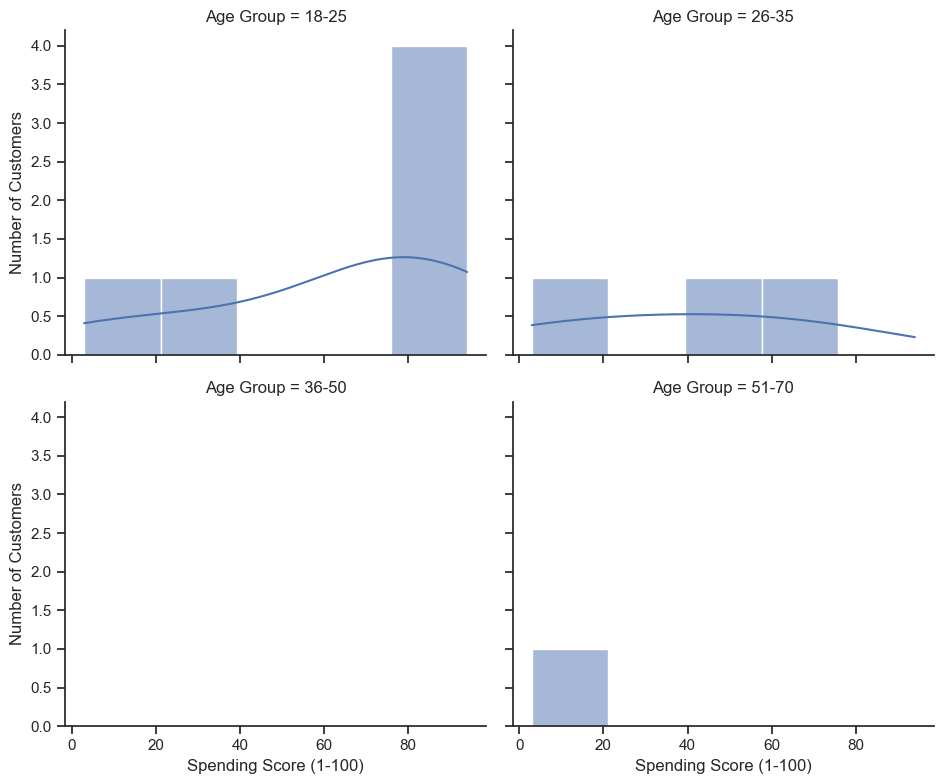

In [71]:
sns.set_theme(style="ticks")
plot=sns.displot(data=df,x="Spending Score (1-100)",col="Age Group",col_wrap=2,kde=True,height=4,aspect=1.2)
plot.set_axis_labels("Spending Score (1-100)", "Number of Customers")
plt.show()